# 图像特效-海报风格

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math
import sklearn
import sklearn.cluster
from sklearn.cluster import KMeans

In [2]:
src = cv2.imread('../datas/f4.jpg')
gray = cv2.imread('../datas/f4.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [20]:
def posterize(src, numColors=5, contrast=40, comic=3,dot=False): 

    img = np.float32(src).copy()

    numPixels = img.shape[0]*img.shape[1]
    X = np.resize(np.asarray(img), (numPixels ,3))
    pixels = img.copy()

    kmeans = KMeans(n_clusters=numColors, random_state=0)
    kmeans.fit(X)

    
    if dot:
        for i in range(img.shape[0]):    # for every pixel:
            for j in range(img.shape[1]):
                modLevel = ((i%6)/3 == (j%6)/3)*12*comic - 6*comic
                modLevel -= comic*((i%3==0)*4 + (i%3==1)*12 + (i%3==2)*6)
                modLevel -= comic*((j%3==0)*1 + (j%3==1)*8 + (j%3==2)*5)            
                modLevel += comic*12.0
                newColor = np.add([modLevel, modLevel, modLevel], pixels[i, j]).astype(int)
                pixels[i, j] = tuple(newColor)
    else:
        for i in range(img.shape[0]):    # for every pixel:
            for j in range(img.shape[1]):
                #modLevel = ((i%4)/2 == (j%4)/2)*16 + ((i%8)/4 == (j%8)/4)*8 - 12
                modLevel = ((i%4)/2 == (j%4)/2)*12*comic - 6*comic
                modLevel += (1-i%2)*(1-j%2)*4*comic
                modLevel -= (i%2)*(j%2)*4*comic
                modLevel += (i%2)*(1-j%2)*2*comic
                modLevel -= (1-i%2)*(j%2)*2*comic
   
                newColor = np.add([modLevel, modLevel, modLevel], pixels[i, j]).astype(int)
                pixels[i, j] = tuple(newColor)
    

    numPixels = img.shape[0]*img.shape[1]
    X = np.resize(np.asarray(img), (numPixels ,3))

    predictions = np.resize(kmeans.predict(X), (img.shape[1], img.shape[0]))
    

    average = [0, 0, 0]
    normAverage = average

    for k in kmeans.cluster_centers_:
        average += k
        #if np.average(
    average /= numColors
    for l in kmeans.cluster_centers_:
            dif = l-average
            push = dif/(np.linalg.norm(dif))
            l += push*max(contrast - np.linalg.norm(dif), contrast/3)
    
    
    for i in range(img.shape[0]):    # for every pixel:
        for j in range(img.shape[1]):
            predictedCluster = predictions[j, i]
            predictedColor = kmeans.cluster_centers_[predictedCluster].astype(int)
            pixels[i, j] = tuple(predictedColor)

    img = img + 25
    img = np.clip(img,0,255)
    img[img < 0] = 0
    img[img > 255] = 255
    return np.uint8(img)


In [21]:
dst = posterize(rgb)

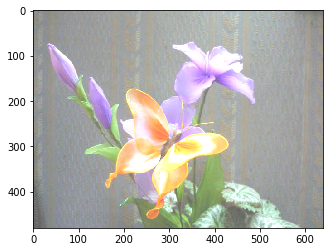

In [22]:
plt.imshow(dst)

In [10]:
def posterize2(src,step = 20):
    srcf = np.float32(src)
    dst = np.zeros_like(src)
    if step < 0:
        step = 1
    if step > 255:
        step = 255
    level = np.floor(255.0 / step)
    dst = np.floor((srcf / level)) * level
    dst = np.clip(dst,0,255)
    return np.uint8(dst)
      

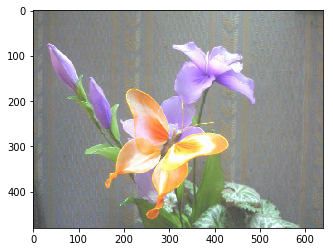

In [11]:
dst2 = posterize2(rgb,step=64)
plt.imshow(dst2)

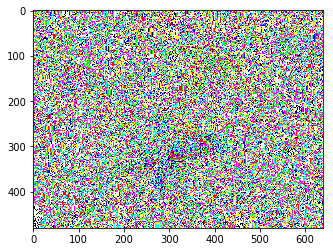

In [12]:
diff = dst2 - rgb
diff[diff < 0] = 0
plt.imshow(diff)